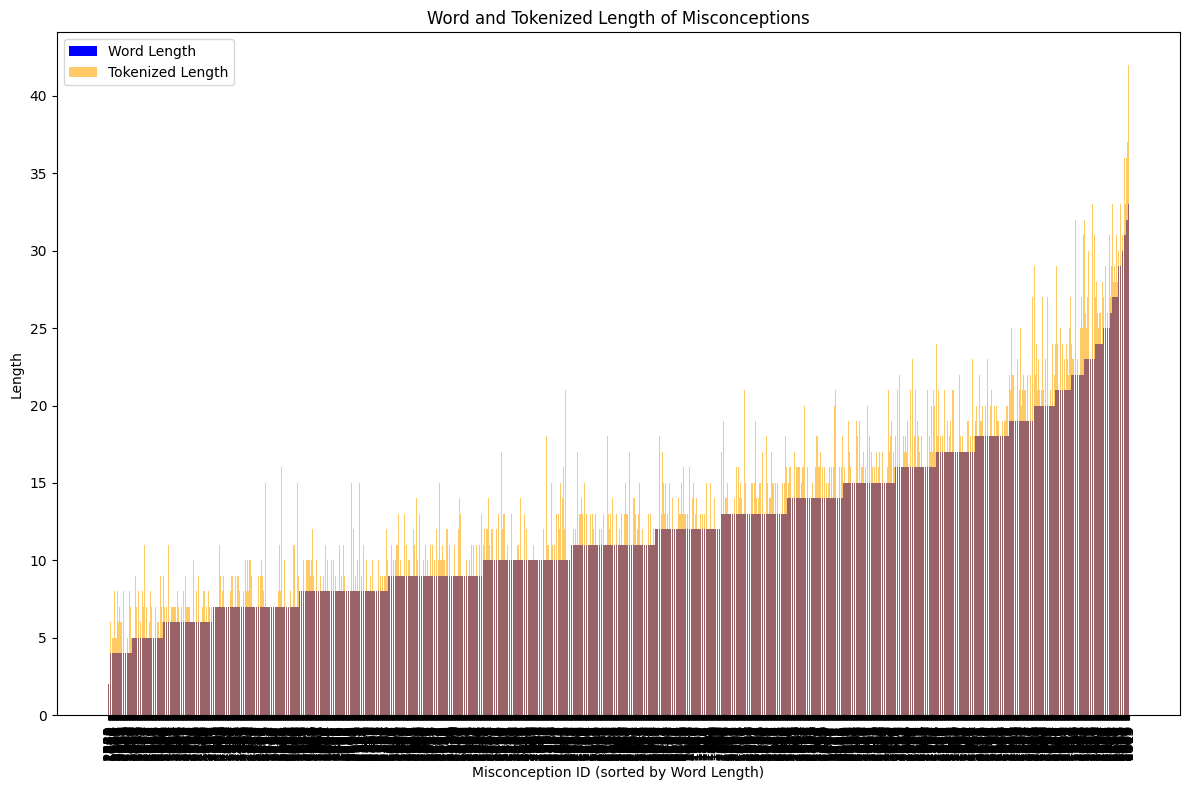

In [5]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
from transformers import AutoTokenizer  # Correct import for Hugging Face tokenizer

# Define the static method to read misconceptions from a file
class MisconceptionAnalyzer:
    @staticmethod
    def _get_misconceptions(file_path: pathlib.Path) -> pd.DataFrame:
        misconceptions = pd.read_csv(file_path)
        # Ensuring columns match the actual file structure
        misconceptions.columns = ['misconception_id', 'misconception']
        return misconceptions

# File path to the misconceptions file
file_path = pathlib.Path('data/misconception_mapping.csv')

# Load the misconceptions data
misconceptions_df = MisconceptionAnalyzer._get_misconceptions(file_path)

# Add a new column for word length of misconceptions
misconceptions_df['word_length'] = misconceptions_df['misconception'].apply(lambda x: len(x.split()))

# Optional: Add a new column for tokenized length of misconceptions
# Initialize the tokenizer using Hugging Face transformers
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")  # Example tokenizer

misconceptions_df['token_length'] = misconceptions_df['misconception'].apply(
    lambda x: len(tokenizer.tokenize(x))
)

# Sort the DataFrame by word length
misconceptions_df = misconceptions_df.sort_values(by='word_length')

# Plotting the word length of misconceptions
plt.figure(figsize=(12, 8))
plt.bar(
    misconceptions_df['misconception_id'].astype(str),
    misconceptions_df['word_length'],
    color='blue',
    label='Word Length'
)

# Optional: Add tokenized lengths to the plot for comparison
plt.bar(
    misconceptions_df['misconception_id'].astype(str),
    misconceptions_df['token_length'],
    color='orange',
    alpha=0.6,
    label='Tokenized Length'
)

plt.xlabel('Misconception ID (sorted by Word Length)')
plt.ylabel('Length')
plt.title('Word and Tokenized Length of Misconceptions')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()
